<a href="https://colab.research.google.com/github/Shravani-std/Deep-Learning/blob/main/Exponential_weighted_moving_avg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/daily-delhi-climate")

print("Path to dataset files:", path)

100%|██████████| 21.6k/21.6k [00:00<00:00, 22.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sukhmandeepsinghbrar/daily-delhi-climate/versions/1


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('/root/.cache/kagglehub/datasets/sukhmandeepsinghbrar/daily-delhi-climate/versions/1/DailyDelhiClimate.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df.drop(['humidity', 'wind_speed', 'meanpressure'], axis=1, inplace=True)
display(df.head())

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


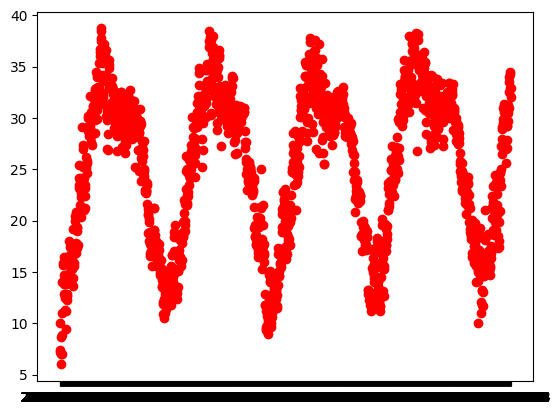

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['date'], df['meantemp'], color = 'red')

In [25]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [26]:
x1

,meantemp
0,10.000000
1,7.636364
2,7.213213
3,8.521452
4,6.252123
...,...
1571,34.403401
1572,34.265340
1573,33.036534
1574,32.891153


In [27]:
if (x1 == df['meantemp']).all():
  print("True")
else:
  print("False")

False


In [28]:
df['ewm'] = x1

In [29]:
df.head()

,date,meantemp,ewm
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123


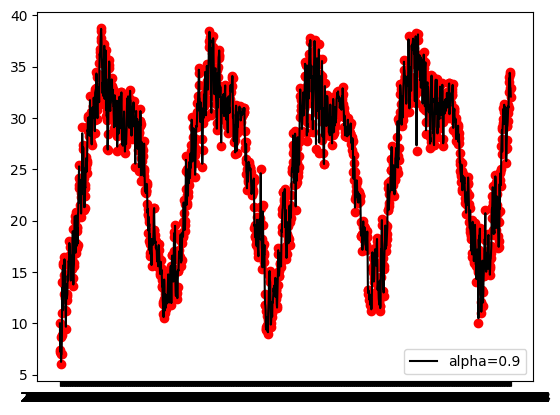

In [30]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color = 'black', label = 'alpha=0.9')
plt.legend()
plt.show()